In [ ]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import os

In [ ]:
df_hour = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/hourly/sample_10.csv' , index_col=0)
df_hour['point_timestamp'] = pd.to_datetime(df_hour['point_timestamp'])
df_hour.head()

,point_timestamp,point_value
0,2022-12-08 13:00:00,NaN
1,2022-12-08 14:00:00,11.0
2,2022-12-08 15:00:00,17.0
3,2022-12-08 16:00:00,27.0
4,2022-12-08 17:00:00,17.0


In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  228 non-null    datetime64[ns]
 1   point_value      227 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [ ]:
df_daily = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/daily/sample_10.csv' , index_col=0)
df_daily['point_timestamp'] = pd.to_datetime(df_daily['point_timestamp'])
df_daily.head()

,point_timestamp,point_value
0,2021-10-15,NaN
1,2021-10-16,442918.0
2,2021-10-17,111549.0
3,2021-10-18,500495.0
4,2021-10-19,544160.0


In [ ]:
df_daily.tail()

,point_timestamp,point_value
470,2023-01-28,27.0
471,2023-01-29,153181.0
472,2023-01-30,541232.0
473,2023-01-31,712411.0
474,2023-02-01,1.0


In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 474
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  475 non-null    datetime64[ns]
 1   point_value      474 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [ ]:
df_daily.set_index(df_daily['point_timestamp'], inplace=True)
df_daily["interpolated_value"] = df_daily['point_value'].interpolate(limit_direction='both' , method='time')

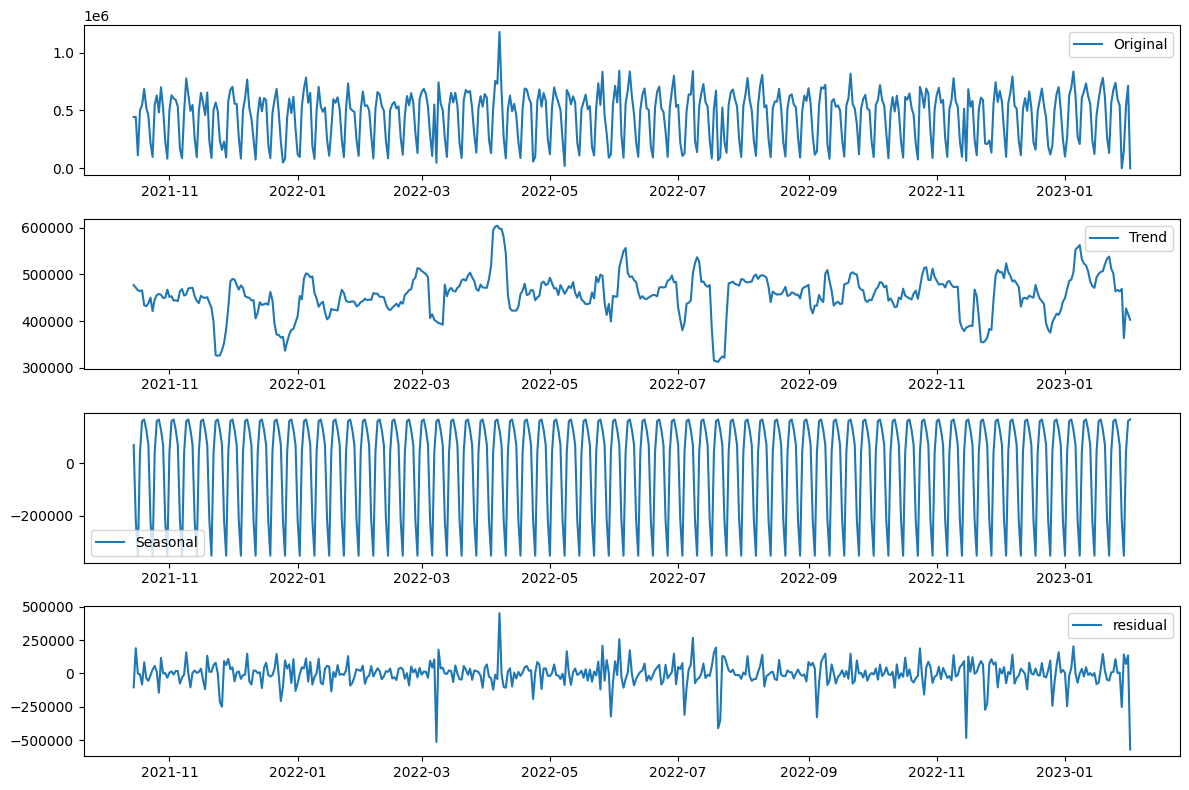

In [ ]:
result = seasonal_decompose(df_daily['interpolated_value'], model='additive' ,extrapolate_trend = 'freq')

trend = result.trend
seasonal = result.seasonal
residual = result.resid

df_daily['trend'] = trend
df_daily['seasonal'] = seasonal
df_daily['residual'] = residual

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_daily['interpolated_value'], label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(residual, label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
df_daily.head()

,point_timestamp,point_value,interpolated_value,trend,seasonal,residual
point_timestamp,,,,,,
2021-10-15,2021-10-15,NaN,442918.0,477212.704082,70067.282809,-104361.986890
2021-10-16,2021-10-16,442918.0,442918.0,471638.515306,-217466.079962,188745.564655
2021-10-17,2021-10-17,111549.0,111549.0,466064.326531,-352528.686429,-1986.640102
2021-10-18,2021-10-18,500495.0,500495.0,464480.428571,42893.442698,-6878.871269
2021-10-19,2021-10-19,544160.0,544160.0,465944.285714,161550.639051,-83334.924765


In [ ]:
df_daily.tail()

,point_timestamp,point_value,interpolated_value,trend,seasonal,residual
point_timestamp,,,,,,
2023-01-28,2023-01-28,27.0,27.0,469036.285714,-217466.079962,-251543.205753
2023-01-29,2023-01-29,153181.0,153181.0,363565.714286,-352528.686429,142143.972143
2023-01-30,2023-01-30,541232.0,541232.0,427233.974490,42893.442698,71104.582813
2023-01-31,2023-01-31,712411.0,712411.0,415084.336735,161550.639051,135776.024214
2023-02-01,2023-02-01,1.0,1.0,402934.698980,167495.606413,-570429.305393


In [ ]:
df_week = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/weekly/sample_1.csv' , index_col=0)
df_week['point_timestamp'] = pd.to_datetime(df_week['point_timestamp'])
df_week.head()

,point_timestamp,point_value
0,2021-01-11,53423552.0
1,2021-01-18,56541361.0
2,2021-01-25,55957540.0
3,2021-02-01,56278317.0
4,2021-02-08,50410674.0


In [ ]:
df_month = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/monthly/sample_1.csv' , index_col=0)
df_month['point_timestamp'] = pd.to_datetime(df_month['point_timestamp'])
df_month.head()

,point_timestamp,point_value
0,2018-01-01,0.000364
1,2018-02-01,0.000313
2,2018-03-01,0.000079
3,2018-04-01,0.000044
4,2018-05-01,0.000000


In [ ]:
MAX_iter = 10
frames = []
for i in range(1, MAX_iter):
  path = '/content/drive/MyDrive/DGdataset/Sample Time Series/daily/sample_{}.csv'.format(i)
  df_daily = pd.read_csv(path , index_col=0)
  frames.append(df_daily)


combined_df_daily = pd.concat(frames)
combined_df_daily['point_timestamp'] = pd.to_datetime(combined_df_daily['point_timestamp'])
combined_df_daily.head()

,point_timestamp,point_value
0,2019-07-14,6.0
1,2019-07-15,7.0
2,2019-07-16,6.0
3,2019-07-17,6.0
4,2019-07-18,7.0


In [ ]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  2967 non-null   datetime64[ns]
 1   point_value      2871 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.5 KB


Handle missing values

In [ ]:
combined_df_daily['point_value'].isnull().sum()

96

In [ ]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  2967 non-null   datetime64[ns]
 1   point_value      2871 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.5 KB


In [ ]:
combined_df_daily.set_index(combined_df_daily['point_timestamp'], inplace=True)
combined_df_daily["interpolated_value"] = combined_df_daily['point_value'].interpolate(method='time')

In [ ]:
combined_df_daily = combined_df_daily.sort_index()

In [ ]:
years = sorted(combined_df_daily.index.year.unique())

fig = px.line(combined_df_daily, x='point_timestamp', y='point_value',category_orders={'x': years})

fig.update_layout(updatemenus=[{'buttons': [{'method': 'relayout',
                                            'label': str(year),
                                            'args': [{'xaxis.range': [str(year) + '-01-01', str(year) + '-12-31']}]}
                                           for year in years],
                               'showactive': True,
                               'x': 0.01,
                               'xanchor': 'left',
                               'y': 1.15,
                               'yanchor': 'top'}])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
years = sorted(combined_df_daily.index.year.unique())

fig = px.line(combined_df_daily, x=combined_df_daily.index, y='interpolated_value',category_orders={'x': years})

fig.update_layout(updatemenus=[{'buttons': [{'method': 'relayout',
                                            'label': str(year),
                                            'args': [{'xaxis.range': [str(year) + '-01-01', str(year) + '-12-31']}]}
                                           for year in years],
                               'showactive': True,
                               'x': 0.01,
                               'xanchor': 'left',
                               'y': 1.15,
                               'yanchor': 'top'}])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# **Data Generation for Daily data for classification Model**

In [ ]:
folder_path = "/content/drive/MyDrive/DGdataset/Sample Time Series/daily/"
frames = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path , index_col = 0)
        frames.append(df)

combined_df_daily = pd.concat(frames)
column_mapping = {
    'point_timestamp': 'date',
    'point_value': 'value',
}

combined_df_daily.rename(columns=column_mapping, inplace=True)
combined_df_daily['date'] = pd.to_datetime(combined_df_daily['date'])
combined_df_daily.set_index(combined_df_daily['date'], inplace=True)
combined_df_daily.sort_index(inplace=True)
combined_df_daily.rename_axis('index',inplace=True)
combined_df_daily.head()

,date,value
index,,
2019-07-14,2019-07-14,6.0
2019-07-15,2019-07-15,7.0
2019-07-16,2019-07-16,6.0
2019-07-17,2019-07-17,6.0
2019-07-18,2019-07-18,7.0


In [ ]:
combined_df_daily.tail()

,date,value
index,,
2023-01-28,2023-01-28,27.0
2023-01-29,2023-01-29,153181.0
2023-01-30,2023-01-30,541232.0
2023-01-31,2023-01-31,712411.0
2023-02-01,2023-02-01,1.0


In [ ]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3442 entries, 2019-07-14 to 2023-02-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3442 non-null   datetime64[ns]
 1   value   3345 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 80.7 KB


In [ ]:
combined_df_daily['value'].isnull().sum()

97

In [ ]:
combined_df_daily['date'].is_unique

False

In [ ]:
if combined_df_daily['date'].is_unique:
    print("All values are unique.")
else:
    # Calculate the average for duplicate values
    combined_df_daily = combined_df_daily.groupby('date').mean().reset_index()
    print("Duplicates were found and removed.")

Duplicates were found and removed.


In [ ]:
combined_df_daily['date'].is_unique

True

In [ ]:
combined_df_daily.head()

,date,value
0,2019-07-14,6.0
1,2019-07-15,7.0
2,2019-07-16,6.0
3,2019-07-17,6.0
4,2019-07-18,7.0


In [ ]:
combined_df_daily.tail()

,date,value
1294,2023-01-28,27.0
1295,2023-01-29,153181.0
1296,2023-01-30,541232.0
1297,2023-01-31,712411.0
1298,2023-02-01,1.0


In [ ]:
combined_df_daily.describe()

,value
count,1.299000e+03
mean,2.707970e+05
std,4.109562e+05
min,1.000000e+00
25%,7.000000e+00
50%,7.751000e+04
75%,2.605617e+05
max,2.158472e+06


In [ ]:
def plot_line_graph(combined_df_daily):
  trace = go.Scatter(
      x=combined_df_daily['date'],
      y=combined_df_daily['value'],
      mode='lines',
      name='Time Series'
  )

  layout = go.Layout(
      title='Time Series Chart with Range Slider',
      xaxis=dict(
          rangeselector=dict(
              buttons=list([
                  dict(count=1, label='1d', step='day', stepmode='backward'),
                  dict(count=7, label='1w', step='day', stepmode='backward'),
                  dict(count=1, label='1m', step='month', stepmode='backward'),
                  dict(count=6, label='6m', step='month', stepmode='backward'),
                  dict(count=1, label='YTD', step='year', stepmode='todate'),
                  dict(count=1, label='1y', step='year', stepmode='backward'),
                  dict(step='all')
              ])
          ),
          rangeslider=dict(
              visible=True
          ),
          type='date'
      )
  )

  fig = go.Figure(data=[trace], layout=layout)
  fig.show()
plot_line_graph(combined_df_daily)

In [ ]:
combined_df_daily[combined_df_daily["date"] >= "02-01-2021"].describe()

,value
count,7.310000e+02
mean,4.377347e+05
std,4.361836e+05
min,1.000000e+00
25%,1.386615e+05
50%,2.161930e+05
75%,8.424488e+05
max,2.158472e+06


In [ ]:
combined_df_daily = combined_df_daily[combined_df_daily["date"] >= "02-01-2021"]

In [ ]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 568 to 1298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    731 non-null    datetime64[ns]
 1   value   731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.1 KB


In [ ]:
plot_line_graph(combined_df_daily)

In [ ]:
combined_df_daily.to_csv(folder_path+'processed_daily.csv')

In [ ]:
!pip install greykite

In [ ]:
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results
import plotly

metadata = MetadataParam(
     time_col="date",  # name of the time column
     value_col="value",  # name of the value column
     freq="D" , #"MS" for Montly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc.
     train_end_date=combined_df_daily['date'].iloc[-1]
 )
forecaster = Forecaster()
result = forecaster.run_forecast_config(
     df=combined_df_daily,
     config=ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=100,  # forecasts 100 steps ahead
         coverage=0.95,  # 95% prediction intervals
         metadata_param=metadata
    )
)

ts = result.timeseries
fig = ts.plot()
plotly.io.show(fig)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/greykite/sklearn/transform/null_transformer.py:177: RuntimeWarning:

Input data has many null values. Missing 12.03% of one input.



In [ ]:
result.timeseries.df["y"]

2021-02-01    903053.004725
2021-02-02    910297.753775
2021-02-03    912559.254575
2021-02-04    920697.253775
2021-02-05    927060.753775
                  ...      
2023-01-28        27.000000
2023-01-29    153181.000000
2023-01-30    541232.000000
2023-01-31    712411.000000
2023-02-01         1.000000
Name: y, Length: 731, dtype: float64

In [ ]:
result.forecast.df['forecast'][:731]

0      945698.802930
1      932916.125042
2      955159.221965
3      944902.033881
4      951139.225900
           ...      
726    221884.032252
727    201438.825745
728    386906.892199
729    405393.211950
730    365409.704709
Name: forecast, Length: 731, dtype: float64

In [ ]:
import numpy as np
def calculate_mape(true_values, predicted_values):
  return np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

In [ ]:
calculate_mape(combined_df_daily['value'] ,result.forecast.df['forecast'][:731])

In [ ]:
combined_df_daily['year'] = combined_df_daily['date'].dt.year
combined_df_daily['month'] = combined_df_daily['date'].dt.month
combined_df_daily['day'] = combined_df_daily['date'].dt.day
combined_df_daily['day_of_week'] = combined_df_daily['date'].dt.dayofweek

In [ ]:
import xgboost as xgb

In [ ]:
num_lags = 3  # Adjust the number of lag features as needed
for i in range(1, num_lags + 1):
    combined_df_daily[f'value_lag_{i}'] = combined_df_daily['value'].shift(i)

In [ ]:
combined_df_daily

,date,value,value_lag_1,value_lag_2,value_lag_3
568,2021-02-01,903053.004725,NaN,NaN,NaN
569,2021-02-02,910297.753775,903053.004725,NaN,NaN
570,2021-02-03,912559.254575,910297.753775,903053.004725,NaN
571,2021-02-04,920697.253775,912559.254575,910297.753775,903053.004725
572,2021-02-05,927060.753775,920697.253775,912559.254575,910297.753775
...,...,...,...,...,...
1294,2023-01-28,27.000000,330402.500000,409355.500000,498262.000000
1295,2023-01-29,153181.000000,27.000000,330402.500000,409355.500000
1296,2023-01-30,541232.000000,153181.000000,27.000000,330402.500000
1297,2023-01-31,712411.000000,541232.000000,153181.000000,27.000000


In [ ]:
X_train = combined_df_daily.drop(['value' , 'date'], axis=1)
y_train = combined_df_daily['value']

In [ ]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

In [ ]:
calculate_mape(combined_df_daily['value'] ,model.predict(X_train).tolist())

149.31806905074885

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing , SimpleExpSmoothing

In [ ]:
model = ExponentialSmoothing(combined_df_daily['value'], trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
result.forecast(steps = 100)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



731    331142.653795
732    335682.167979
733    330551.374405
734    327036.054964
735    321499.470869
           ...      
826    453009.255291
827    457589.765942
828    462129.280126
829    456998.486552
830    453483.167111
Length: 100, dtype: float64

In [ ]:
calculate_mape(combined_df_daily['value'] ,result.fittedvalues.tolist())

66442.12796545963

In [ ]:
!pip install prophet -q

In [ ]:
from prophet import Prophet

In [ ]:
combined_df_daily_copy = combined_df_daily.rename(columns={'date': 'ds', 'value': 'y'})

In [ ]:
combined_df_daily_copy

,ds,y
568,2021-02-01,903053.004725
569,2021-02-02,910297.753775
570,2021-02-03,912559.254575
571,2021-02-04,920697.253775
572,2021-02-05,927060.753775
...,...,...
1294,2023-01-28,27.000000
1295,2023-01-29,153181.000000
1296,2023-01-30,541232.000000
1297,2023-01-31,712411.000000


In [ ]:
model = Prophet()

model.fit(combined_df_daily_copy)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzaox5tcy/o0691prg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzaox5tcy/u_4jglek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98956', 'data', 'file=/tmp/tmpzaox5tcy/o0691prg.json', 'init=/tmp/tmpzaox5tcy/u_4jglek.json', 'output', 'file=/tmp/tmpzaox5tcy/prophet_modelee1i43z_/prophet_model-20230929154717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_periods = 0

future = model.make_future_dataframe(periods=forecast_periods)

In [ ]:
forecast = model.predict(future)

In [ ]:
calculate_mape(combined_df_daily['value'] ,forecast['yhat'][:731])

79.39596277627807

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-01,1.180118e+06,894934.740602,1.262871e+06,1.180118e+06,1.180118e+06,-108328.491070,-108328.491070,-108328.491070,-9362.464392,-9362.464392,-9362.464392,-98966.026678,-98966.026678,-98966.026678,0.0,0.0,0.0,1.071790e+06
1,2021-02-02,1.178493e+06,905734.105900,1.264907e+06,1.178493e+06,1.178493e+06,-90767.730257,-90767.730257,-90767.730257,6097.156903,6097.156903,6097.156903,-96864.887160,-96864.887160,-96864.887160,0.0,0.0,0.0,1.087725e+06
2,2021-02-03,1.176868e+06,894870.971114,1.268152e+06,1.176868e+06,1.176868e+06,-87783.919000,-87783.919000,-87783.919000,6774.835143,6774.835143,6774.835143,-94558.754143,-94558.754143,-94558.754143,0.0,0.0,0.0,1.089084e+06
3,2021-02-04,1.175242e+06,900818.302544,1.257650e+06,1.175242e+06,1.175242e+06,-92664.091172,-92664.091172,-92664.091172,-600.573110,-600.573110,-600.573110,-92063.518062,-92063.518062,-92063.518062,0.0,0.0,0.0,1.082578e+06
4,2021-02-05,1.173617e+06,884669.071825,1.243187e+06,1.173617e+06,1.173617e+06,-102031.154255,-102031.154255,-102031.154255,-12633.498529,-12633.498529,-12633.498529,-89397.655726,-89397.655726,-89397.655726,0.0,0.0,0.0,1.071586e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2023-01-28,4.855849e+05,218602.158808,5.679957e+05,4.855849e+05,4.855849e+05,-88740.552302,-88740.552302,-88740.552302,16905.993846,16905.993846,16905.993846,-105646.546148,-105646.546148,-105646.546148,0.0,0.0,0.0,3.968444e+05
727,2023-01-29,4.876890e+05,205935.292140,5.554887e+05,4.876890e+05,4.876890e+05,-111742.814229,-111742.814229,-111742.814229,-7181.449860,-7181.449860,-7181.449860,-104561.364369,-104561.364369,-104561.364369,0.0,0.0,0.0,3.759461e+05
728,2023-01-30,4.897930e+05,195931.431533,5.542325e+05,4.897930e+05,4.897930e+05,-112611.820418,-112611.820418,-112611.820418,-9362.464392,-9362.464392,-9362.464392,-103249.356026,-103249.356026,-103249.356026,0.0,0.0,0.0,3.771812e+05
729,2023-01-31,4.918970e+05,208943.662928,5.713211e+05,4.918970e+05,4.918970e+05,-95609.756679,-95609.756679,-95609.756679,6097.156903,6097.156903,6097.156903,-101706.913582,-101706.913582,-101706.913582,0.0,0.0,0.0,3.962873e+05


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf


result = adfuller(combined_df_daily['value'])
p_value = result[1]

if p_value < 0.05:
    d = 0
else:
    d = 1

pacf_values = pacf(combined_df_daily['value'], nlags=40, method='ols')
acf_values = pacf(combined_df_daily['value'], nlags=40, method='ols')

for p in range(1, len(pacf_values)):
    if abs(pacf_values[p]) < 1.96 / np.sqrt(len(df)):
        break

for q in range(1, len(acf_values)):
    if abs(acf_values[q]) < 1.96 / np.sqrt(len(df)):
        break


model = sm.tsa.arima.ARIMA(combined_df_daily['value'], order=(p, d, q))
results = model.fit()

forecast_periods = 12
pred = results.forecast(steps=forecast_periods)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No su

In [ ]:
pred

731     -4507.427728
732    117670.975399
733    251235.468792
734    310501.182381
735    282644.519960
736    212446.620899
737    156485.797416
738    144626.679737
739    170152.292914
740    205507.304841
741    225846.463645
742    223440.340987
Name: predicted_mean, dtype: float64

In [ ]:
calculate_mape(combined_df_daily['value'] ,results.fittedvalues)

# **Data Generation for rest of the data for classification Model**

In [ ]:
folder_path = ["/content/drive/MyDrive/DGdataset/Sample Time Series/monthly/" ,"/content/drive/MyDrive/DGdataset/Sample Time Series/hourly/" , "/content/drive/MyDrive/DGdataset/Sample Time Series/weekly/" ]

for index , folder in enumerate(folder_path):
  frames = []

  for filename in os.listdir(folder):
      if filename.endswith(".csv"):
          file_path = os.path.join(folder, filename)
          df = pd.read_csv(file_path , index_col = 0)
          frames.append(df)

  combined_df = pd.concat(frames)
  column_mapping = {
      'point_timestamp': 'date',
      'point_value': 'value',
  }

  combined_df.rename(columns=column_mapping, inplace=True)

  if combined_df['date'].is_unique:
    print("All values are unique.")
  else:
    combined_df = combined_df.groupby('date').mean().reset_index()
    print("Duplicates were found and removed.")

  combined_df['date'] = pd.to_datetime(combined_df['date'])
  combined_df.set_index(combined_df['date'], inplace=True)
  combined_df.sort_index(inplace=True)
  combined_df.rename_axis('index',inplace=True)

  if combined_df['value'].isnull().sum():
    combined_df["value"] = combined_df['value'].interpolate(limit_direction='both' , method='time')
    print("Missing value interpolated")

  if "hourly" in folder:
    date_range_filter = (combined_df["date"] >=  "08-10-2022" ) & (combined_df["date"] <= "10-12-2022")
    combined_df = combined_df[date_range_filter]
    combined_df.to_csv(folder+'processed_hourly.csv' , index=False)

  if "weekly" in folder:
    date_range_filter = (combined_df["date"] >  "01-04-2021") & (combined_df["date"] < "07-18-2022" )
    combined_df = combined_df[date_range_filter]
    combined_df.to_csv(folder+'processed_weekly.csv' , index=False)

  if "monthly" in folder:
    date_range_filter = (combined_df["date"] >  "01-01-2009") & (combined_df["date"] < "01-01-2021" )
    combined_df = combined_df[date_range_filter]
    combined_df.to_csv(folder+'processed_monthly.csv' , index=False)

print("PreProcessing completed !")

Duplicates were found and removed.
Duplicates were found and removed.
Missing value interpolated
Duplicates were found and removed.
Missing value interpolated
PreProcessing completed !


In [ ]:
combined_df.head()

,date,value
index,,
2021-01-11,2021-01-11,2.024538e+07
2021-01-18,2021-01-18,2.148151e+07
2021-01-25,2021-01-25,2.144460e+07
2021-02-01,2021-02-01,2.090639e+07
2021-02-08,2021-02-08,1.922613e+07


In [ ]:
combined_df.tail()

,date,value
index,,
2022-06-13,2022-06-13,1.986302e+07
2022-06-20,2022-06-20,1.570399e+04
2022-06-27,2022-06-27,2.859788e+04
2022-07-04,2022-07-04,1.790088e+04
2022-07-11,2022-07-11,2.769892e+04


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2021-01-11 to 2022-07-11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    79 non-null     datetime64[ns]
 1   value   79 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [ ]:
plot_line_graph(combined_df)